In [1]:
import  pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
x=df.drop('target', axis=1)
y=df['target']

In [4]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [5]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.20, random_state=42, stratify=y)

In [8]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score

In [10]:
#  training 
y_pred=model.predict(x_train)

accuracy= accuracy_score(y_train, y_pred)
print(accuracy)

matrix= confusion_matrix(y_train, y_pred)
print(matrix)

report= classification_report(y_train, y_pred)
print(report)

1.0
[[110   0]
 [  0 132]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [11]:
#  testing  
y_pred_test=model.predict(x_test)

accuracy= accuracy_score(y_test, y_pred_test)
print(accuracy)

matrix= confusion_matrix(y_test, y_pred_test)
print(matrix)

report= classification_report(y_test, y_pred_test)
print(report)

0.6721311475409836
[[17 11]
 [ 9 24]]
              precision    recall  f1-score   support

           0       0.65      0.61      0.63        28
           1       0.69      0.73      0.71        33

    accuracy                           0.67        61
   macro avg       0.67      0.67      0.67        61
weighted avg       0.67      0.67      0.67        61



In [12]:
model_DT=DecisionTreeClassifier()
model_DT.fit(x_train,y_train)

y_predict_test=model_DT.predict(x_test)

accuracy_score1=accuracy_score(y_test,y_predict_test)
recall_score1=recall_score(y_test,y_predict_test)
classification_report1=classification_report(y_test,y_predict_test)

print('Testing Data Evaluation of Decision Tree')
print(f'accuracy_score1: {accuracy_score1}')
print(f'recall_score: {recall_score1}')
print(classification_report1)

print('x'*60)

y_predict_train=model_DT.predict(x_train)

accuracy_score2=accuracy_score(y_train,y_predict_train)
recall_score2=recall_score(y_train,y_predict_train)
classification_report2=classification_report(y_train,y_predict_train)

print('Training Data Evaluation of Decision Tree')
print(f'accuracy_score: {accuracy_score2}')
print(f'recall_score: {recall_score2}')
print(classification_report2)

print('x'*60)
print(f'Bias={abs(0.95-accuracy_score2)*100}')
print(f'Varience={(accuracy_score2-accuracy_score1)*100}')

Testing Data Evaluation of Decision Tree
accuracy_score1: 0.7377049180327869
recall_score: 0.8181818181818182
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        28
           1       0.73      0.82      0.77        33

    accuracy                           0.74        61
   macro avg       0.74      0.73      0.73        61
weighted avg       0.74      0.74      0.74        61

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Training Data Evaluation of Decision Tree
accuracy_score: 1.0
recall_score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Bias=5.000000000000004
Varience=26

## Hyper paramaeter Tunning

In [13]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [24]:
## Hyper paramater tunning
hyper={'criterion':["gini", "entropy"],
    'max_depth':np.arange(1,20),
    'min_samples_split':np.arange(2,10),
    'min_samples_leaf':np.arange(1,10)
      }
h_var=RandomizedSearchCV(model, hyper, cv=5)

In [25]:
h_var.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [26]:
h_var.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=9,
                       min_samples_split=6)

In [27]:


y_predict_test=h_var.predict(x_test)

accuracy_score1=accuracy_score(y_test,y_predict_test)
recall_score1=recall_score(y_test,y_predict_test)
classification_report1=classification_report(y_test,y_predict_test)

print('Testing Data Evaluation of Decision Tree')
print(f'accuracy_score1: {accuracy_score1}')
print(f'recall_score: {recall_score1}')
print(classification_report1)

print('x'*60)

y_predict_train=h_var.predict(x_train)

accuracy_score2=accuracy_score(y_train,y_predict_train)
recall_score2=recall_score(y_train,y_predict_train)
classification_report2=classification_report(y_train,y_predict_train)

print('Training Data Evaluation of Decision Tree')
print(f'accuracy_score: {accuracy_score2}')
print(f'recall_score: {recall_score2}')
print(classification_report2)

print('x'*60)
print(f'Bias={abs(0.95-accuracy_score2)*100}')
print(f'Varience={(accuracy_score2-accuracy_score1)*100}')

Testing Data Evaluation of Decision Tree
accuracy_score1: 0.7868852459016393
recall_score: 0.9393939393939394
              precision    recall  f1-score   support

           0       0.89      0.61      0.72        28
           1       0.74      0.94      0.83        33

    accuracy                           0.79        61
   macro avg       0.82      0.77      0.78        61
weighted avg       0.81      0.79      0.78        61

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Training Data Evaluation of Decision Tree
accuracy_score: 0.8512396694214877
recall_score: 0.9166666666666666
              precision    recall  f1-score   support

           0       0.89      0.77      0.83       110
           1       0.83      0.92      0.87       132

    accuracy                           0.85       242
   macro avg       0.86      0.84      0.85       242
weighted avg       0.85      0.85      0.85       242

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Bias

# 1. Embedded methods

In [28]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# model1=h_var.best_estimator_
# model1.fit(x_train,y_train)
# plt.figure(figsize=(200,100))
# plot=plot_tree(model1, feature_names=x.columns, class_names= ['0','1'], filled=True)
# plt.savefig('Tre.png')

In [36]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [60]:
model.feature_importances_

array([0.0510804 , 0.0650974 , 0.29578911, 0.04773806, 0.13973995,
       0.02261905, 0.        , 0.05074698, 0.01417989, 0.12761617,
       0.04672859, 0.0492674 , 0.08939699])

<Axes: >

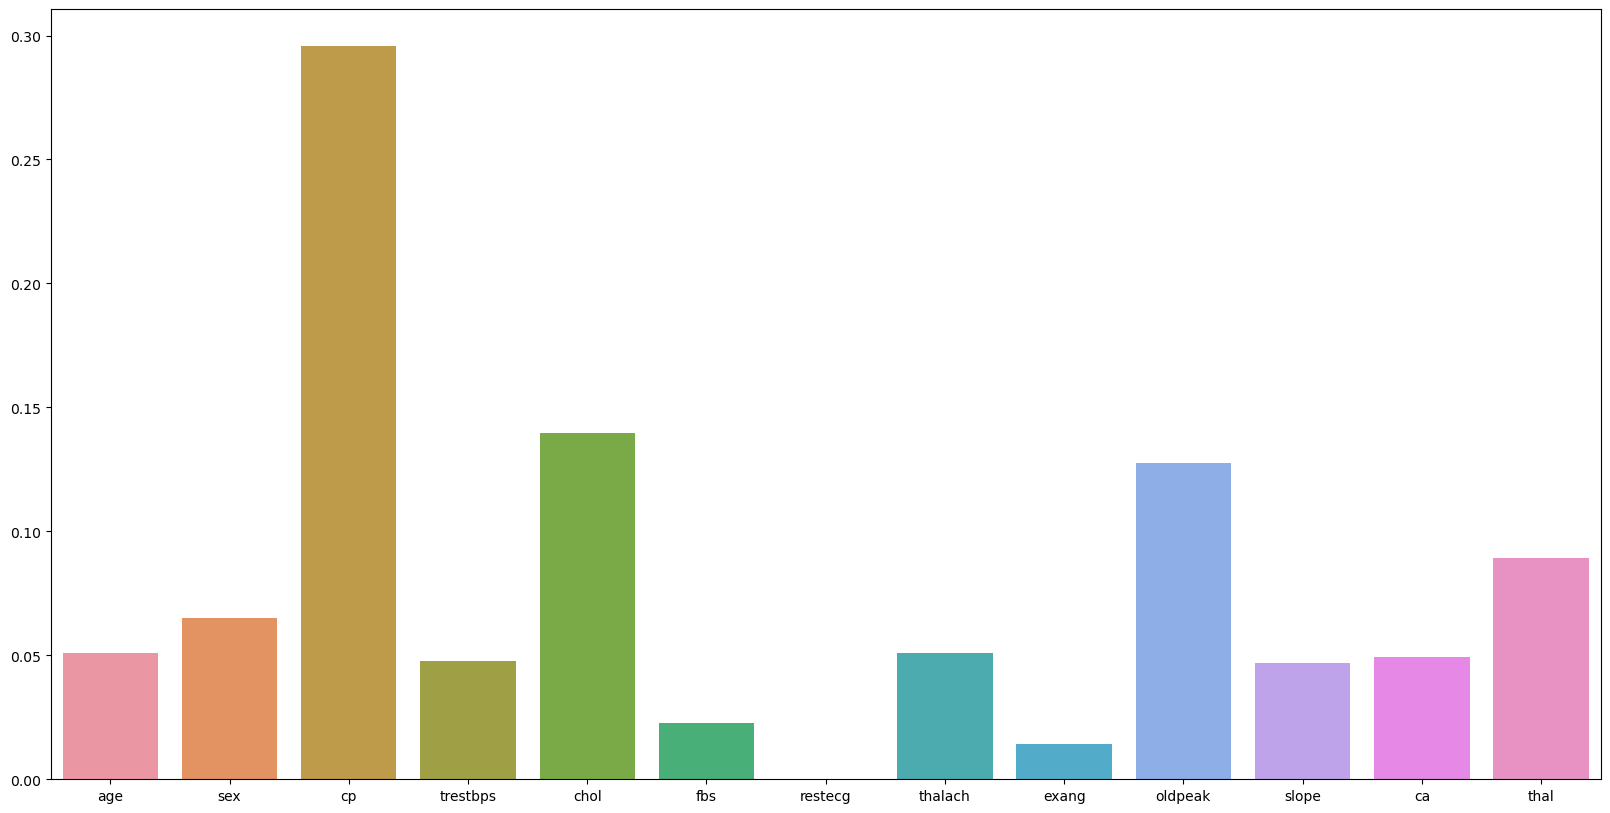

In [61]:
plt.figure(figsize=(20,10))
sns.barplot(x=x.columns, y=model.feature_importances_)

# 2. Wrapper Methode

## 2.1 forward selection method

In [ ]:
model=DecisionTreeClassifier()

In [52]:
from sklearn.feature_selection import SequentialFeatureSelector

In [56]:
vat=SequentialFeatureSelector(h_var, direction='forward',n_features_to_select=5)

In [57]:
vat.fit(x_train, y_train)
new=vat.get_feature_names_out()
new

array(['sex', 'cp', 'fbs', 'ca', 'thal'], dtype=object)

## 2.2 Backward selection elimination

In [63]:
back=SequentialFeatureSelector(h_var, direction='backward',n_features_to_select=5)
back.fit(x_train, y_train)
new=vat.get_feature_names_out()
new

array(['sex', 'cp', 'fbs', 'ca', 'thal'], dtype=object)

## 2.3 Exhautive selection method

In [66]:
from mlxtend.feature_selection import  ExhaustiveFeatureSelector

In [68]:
# ext_m= ExhaustiveFeatureSelector(h_var, min_features=1, max_features=5)
# ext_m.fit(x_train, y_train)
# new=ext_m.get_feature_names_out()
# new

## 2.4 Recursive selection elimination

In [75]:
from sklearn.feature_selection import RFE
rfe= RFE(model, n_features_to_select=5)
rfe.fit(x,y)
new=rfe.get_feature_names_out()
new

array(['age', 'cp', 'thalach', 'oldpeak', 'ca'], dtype=object)